In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


Bad key "text.kerning_factor" on line 4 in
C:\Users\Asus\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Read the CSV file and look at the first five rows of the data
data=pd.read_csv("Wholesale customers data.csv")
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [3]:
#See that there is a lot of variation in the magnitude of the data. Variables like Channel and Region have low magnitude whereas variables like Fresh, Milk, Grocery, etc.have a higher magnitude.
print(data.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

In [4]:
#Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude
#Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [5]:
#See statistics of scaled data
print(pd.DataFrame(data_scaled).describe())

                  0             1             2           3             4  \
count  4.400000e+02  4.400000e+02  4.400000e+02  440.000000  4.400000e+02   
mean   1.614870e-17  3.552714e-16 -3.431598e-17    0.000000 -4.037175e-17   
std    1.001138e+00  1.001138e+00  1.001138e+00    1.001138  1.001138e+00   
min   -6.902971e-01 -1.995342e+00 -9.496831e-01   -0.778795 -8.373344e-01   
25%   -6.902971e-01 -7.023369e-01 -7.023339e-01   -0.578306 -6.108364e-01   
50%   -6.902971e-01  5.906683e-01 -2.767602e-01   -0.294258 -3.366684e-01   
75%    1.448652e+00  5.906683e-01  3.905226e-01    0.189092  2.849105e-01   
max    1.448652e+00  5.906683e-01  7.927738e+00    9.183650  8.936528e+00   

                  5             6             7  
count  4.400000e+02  4.400000e+02  4.400000e+02  
mean   3.633457e-17  2.422305e-17 -8.074349e-18  
std    1.001138e+00  1.001138e+00  1.001138e+00  
min   -6.283430e-01 -6.044165e-01 -5.402644e-01  
25%   -4.804306e-01 -5.511349e-01 -3.964005e-01  
50%   

In [6]:
#Defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

In [7]:
#Fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [8]:
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion
print(kmeans.inertia_)

2599.384423783626


In [9]:
#We got an inertia value of almost 2600. Now, let’s see how we can use the elbow curve to determine the optimum number of clusters in Python.
#We will first fit multiple k-means models and in each successive model, we will increase the number of clusters.
#We will store the inertia value of each model and then plot it to visualize the result

SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\Asus\anacon

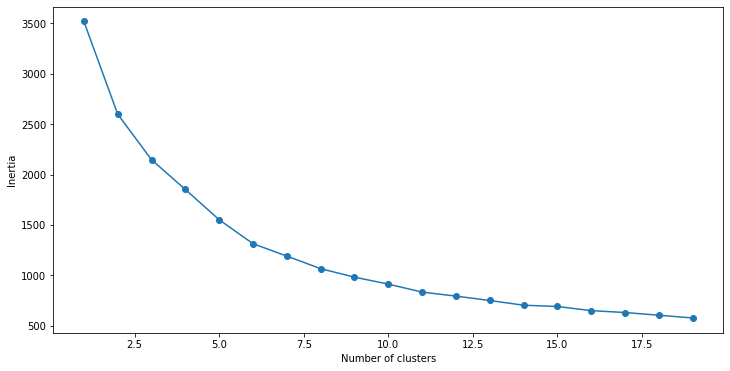

In [10]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [11]:
#Can you tell the optimum cluster value from this plot? Looking at the above elbow curve, we can choose any number of clusters between 5 to 8.
#Let’s set the number of clusters as 6 and fit the model

kmeans = KMeans(n_jobs = -1, n_clusters=6, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [12]:
#let’s look at the value count of points in each of the above-formed clusters
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
print(frame['cluster'].value_counts())

3    174
2    125
1     86
0     44
5     10
4      1
Name: cluster, dtype: int64


In [16]:
#Concatinating data_scaled with their group number
data_scaled_with_groupnumber = pd.concat([pd.DataFrame(data_scaled, columns = data.columns),pd.DataFrame(pred, columns= ['Group'])], axis=1, join='inner')
data_scaled_with_groupnumber.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,2
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,2
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,2
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,3
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,2


In [18]:
#let’s look at the value count of points in each of the above-formed clusters
print(data_scaled_with_groupnumber['Group'].value_counts())

3    174
2    125
1     86
0     44
5     10
4      1
Name: Group, dtype: int64
